<h2 align = "center">Mod 9: Data Augmentation</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lattevision as lv
import lattevision.datasets as dsets
import lattevision.transforms as T


In [2]:
def quick_glance(
    dataset, transform, h: int = 28, w: int = 28, row: int = 10, col: int = 10
) -> None:
    np.random.seed(42)
    h_, w_ = 28, 28
    img = np.zeros((h_ * row, w_ * col))
    img_transformed = np.zeros((h * row, w * col))

    for r in range(row):
        for c in range(col):
            idx = np.random.randint(len(dataset.data))
            img[r * h_ : (r + 1) * h_, c * w_ : (c + 1) * w_] = dataset.data[
                idx
            ].reshape(h_, w_)
            img_transformed[r * h : (r + 1) * h, c * w : (c + 1) * w] = dataset[idx][
                0
            ].reshape(h, w)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original')
    plt.subplot(1, 2, 2)
    plt.imshow(img_transformed)
    plt.axis('off')
    plt.title('Transformed')
    plt.show()

    print(f"Transform shape: {dataset[0][0].shape}")


## 1. Normalize

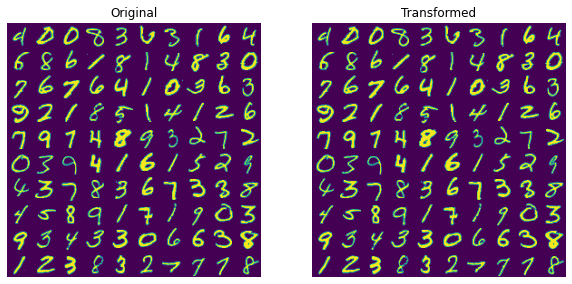

Transform shape: (1, 28, 28)


In [3]:
mnist_root = '../data/mnist'
mnist_transform = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])
mnist_train = dsets.MNIST(mnist_root, train=True, transform=mnist_transform)

quick_glance(mnist_train, mnist_transform)


## 2. Resize

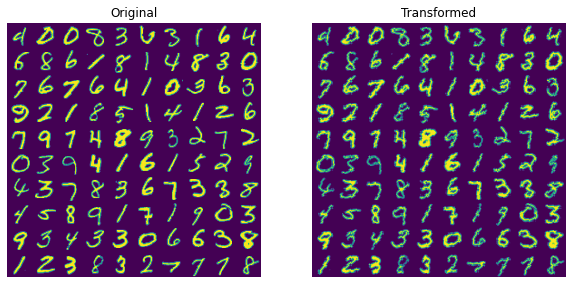

Transform shape: (1, 32, 32)


In [4]:
size = 32  # Format support: (h, w) or k for (k, k)

mnist_root = '../data/mnist'
mnist_transform = T.Compose(
    [T.Resize(size), T.ToTensor(), T.Normalize((0.1307,), (0.3081,))]
)
mnist_train = dsets.MNIST(mnist_root, train=True, transform=mnist_transform)

quick_glance(mnist_train, mnist_transform, h=size, w=size)


## 3. Center Crop

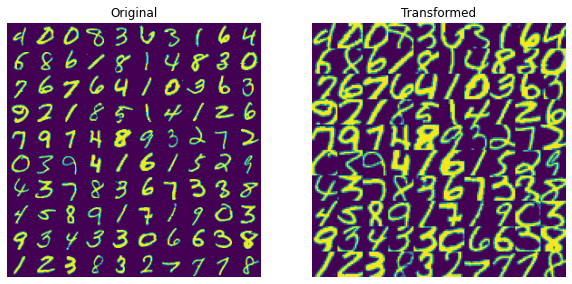

Transform shape: (1, 16, 16)


In [5]:
size = 16  # Format support: (h, w) or k for (k, k)

mnist_root = '../data/mnist'
mnist_transform = T.Compose(
    [T.CenterCrop(size), T.ToTensor(), T.Normalize((0.1307,), (0.3081,))]
)
mnist_train = dsets.MNIST(mnist_root, train=True, transform=mnist_transform)

quick_glance(mnist_train, mnist_transform, h=size, w=size)


## 4. Random Crop

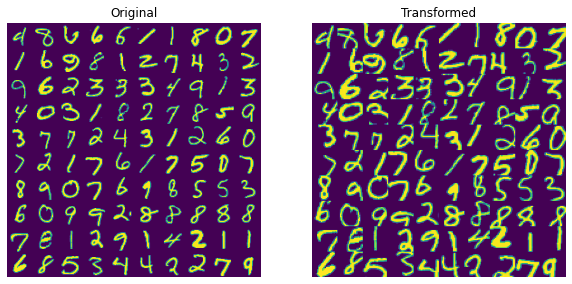

Transform shape: (1, 20, 20)


In [6]:
size = 20  # Format support: (h, w) or k for (k, k)

mnist_root = '../data/mnist'
mnist_transform = T.Compose(
    [T.RandomResizedCrop(size), T.ToTensor(), T.Normalize((0.1307,), (0.3081,))]
)
mnist_train = dsets.MNIST(mnist_root, train=True, transform=mnist_transform)

quick_glance(mnist_train, mnist_transform, h=size, w=size)


## 5. Random Rotate

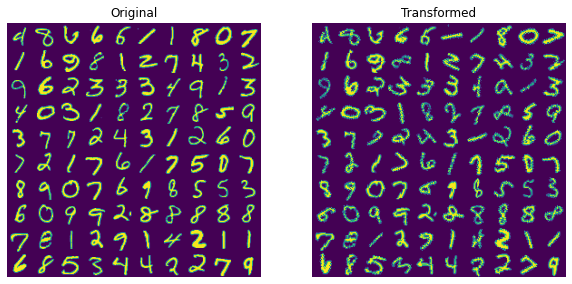

Transform shape: (1, 28, 28)


In [7]:
radians = (-np.pi / 4, np.pi / 4)  # Conter-clockwise is positive

mnist_root = '../data/mnist'
mnist_transform = T.Compose(
    [T.RandomRotation(radians), T.ToTensor(), T.Normalize((0.1307,), (0.3081,))]
)
mnist_train = dsets.MNIST(mnist_root, train=True, transform=mnist_transform)

quick_glance(mnist_train, mnist_transform)
